In [39]:
import pandas as pd

In [40]:
import numpy as np

In [41]:
series = pd.Series({
    'Bulbasaur': 49, 
    'Charmander': 43, 
    'Squirtle': 65, 
    'Pikachu': 40, 
    'Onix': 160
    }, name="Pokemon Savunma Güçleri")

In [42]:
pokemon = pd.DataFrame({
    'atak': [49, 52, 48, 55, 45],
    'savunma': [49, 43, 65, 40, 160],
     'hız': [45, 65, 43, 90, 70],
     'tür': ['ot', 'ateş', 'su', 'elektrik', 'kaya'],
    'boy': [0.7, 0.6, 0.5, 0.4, 8.8]
    }, index=["Bulbasaur", "Charmander", "Squirtle", "Pikachu", "Onix"])

# Sütun Oluşturma ve Veri Okuma

### Dataframe'leri Değiştirme/Düzenleme
* Satır ekleme
* Charmander'in gelişmiş hali olan Charizard'ı da ekleyelim:
* Not: dataframe'e satırı eklemek için kodu: pokemon = pokemon.append(...) şekinde yazmamız gerekir.

In [57]:
pokemon.append(pd.Series({
    "atak": 104,
    "savunma": 78,
    "tür": "ateş",
    "hız": 100,
    "boy": 1.7
}, name="Charizard"))

C:\Users\Alper\AppData\Local\Temp\ipykernel_13012\1528612821.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pokemon.append(pd.Series({


,atak,savunma,hız,tür,boy,toplam güç,saldırganlık
Bulbasaur,49,49,45,ot,0.7,143.0,1.000000
Charmander,52,43,65,ateş,0.6,160.0,1.209302
Squirtle,48,65,43,su,0.5,156.0,0.738462
Pikachu,55,40,90,elektrik,0.4,185.0,1.375000
Onix,45,160,70,kaya,8.8,275.0,0.281250
Charizard,104,78,100,ateş,1.7,NaN,NaN


In [ ]:
Charizard = pd.DataFrame({
    "atak": [104],
    "savunma": [78],
    "tür": ["ateş"],
    "hız": [100],
    "boy": [1.7]},
    index=["Charizard"])

In [ ]:
pd.concat([pokemon,Charizard])

### Sütunları kullanarak yeni bir sütun oluşturma
* Örneğin; atak, savunma ve hız değerlerini toplayıp "toplam güç" adında bir sütuna yazabiliriz:

In [44]:
# sütunu oluşturalım
pokemon["toplam güç"] = pokemon["atak"] + pokemon["savunma"] + pokemon["hız"]
# dataframe'i yazdıralım
pokemon

,atak,savunma,hız,tür,boy,toplam güç
Bulbasaur,49,49,45,ot,0.7,143
Charmander,52,43,65,ateş,0.6,160
Squirtle,48,65,43,su,0.5,156
Pikachu,55,40,90,elektrik,0.4,185
Onix,45,160,70,kaya,8.8,275


* Ya da "atak/savunma" oranını yani bir pokemonun ne kadar atak yapmaya yönelik olduğunu (saldırganlık) bulabiliriz:

In [45]:
# sütunu ekleyelim
pokemon["saldırganlık"] = pokemon["atak"] / pokemon["savunma"]

# dataframe'i yazdıralım
pokemon

,atak,savunma,hız,tür,boy,toplam güç,saldırganlık
Bulbasaur,49,49,45,ot,0.7,143,1.000000
Charmander,52,43,65,ateş,0.6,160,1.209302
Squirtle,48,65,43,su,0.5,156,0.738462
Pikachu,55,40,90,elektrik,0.4,185,1.375000
Onix,45,160,70,kaya,8.8,275,0.281250


* Şu anda yaptığımız işlem, veri analizi için önemli bir işlemdi. Pokemonların atak/savunma oranları bize önemli bir bilgi veriyor. Saldırganlık değerlerine baktığımızda en az saldırgan olan pokemonun Onix olduğunu görüyoruz ki bu pokemon kaya türü olan ve tam bir savunma pokemonu. Squirtle da kaplumbağaya benzeyen bir pokemon ve savunmaya meyilli. Atak pokemonları olarak ise Charmander'ı ve özellikle Pikachu'yu görüyoruz. Evet, Pikachu'nun atağı güçlü ancak savunması zayıf.

### İstatistiksel bilgi edinmek
* NumPy array'lerde yapabileceğimiz istatistiksel hesaplamaları aynı şekilde dataframe ya da serilerde de yapabiliriz. Önceden gördüğümüz gibi ".describe()" metodu ile sayısal sütunların istatistiksel bilgisini edinebiliriz.

### Dışarıdan Veri Okuma
* Pandas kullanarak CSV, Excel, JSON gibi dosyaları okuyabilir ve dataframe'lere yükleyebiliriz. Pandas ile en çok CSV dosyaları kullanılır. "Comma Separated Values" yani "virgül ile ayrılmış değerler" anlamına gelir. Verideki her değer birer virgül ile, her satır ise birer satır sonu ile ayrılmıştır. Örneğin; aşağıda bitcoin'in zamana göre değerlerini içeren bir CSV verisi örneği var:

* 2017-04-02 00:00:00,1099.169125
* 2017-04-03 00:00:00,1141.813

* Bazı CSV verilerinde ilk satırda sütunların hangi bilgileri içerdiği yazabilir:

* zaman,değer
* 2017-04-02 00:00:00,1099.169125
* 2017-04-03 00:00:00,1141.813

* Biz "btc-market-price.csv" adlı zamana bağlı bitcoin fiyatlarını gösteren bir veriyi inceleyeceğiz.
* Dosyanın konumunu "pd.read_csv" fonksiyonuna parametre olarak girerek CSV dosyasını bir Dataframe şeklinde okuyabiliriz:

In [46]:
# veriyi okuyalım
df = pd.read_csv('btc-market-price.csv')

In [47]:
# verinin ilk 5 satırını yazdıralım
df.head()

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


* Veriyi okuduk, her satıra birer indeks verildi ancak bu veride ilk satırda sütun isimleri yoktu. Yukarıda ilk satırın sütun isimleri olarak alındığını görebiliriz. Bunu şöyle düzeltebiliriz:

In [48]:
# sütun isimleri olmayan veriyi okuyalım
df = pd.read_csv('btc-market-price.csv', header=None)

In [49]:
# sütun isimlerini kendimiz verelim
df.columns = ["zaman", "değer"]

In [50]:
# # verinin ilk 5 satırını yazdıralım
df.head()

,zaman,değer
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


* Zaman değerlerini string olarak değil de Datetime objesi şeklinde kullanabiliriz. "pd.to_datetime" metodu ile Datetime'a yani zaman objesine dönüştürebiliriz:

In [51]:
# dönüştürelim
df["zaman"] = pd.to_datetime(df["zaman"])

In [52]:
# zaman değerlerini yazdıralım
df["zaman"].head()

0   2017-04-02
1   2017-04-03
2   2017-04-04
3   2017-04-05
4   2017-04-06
Name: zaman, dtype: datetime64[ns]

* Dataframe'in indeksini zaman değerleri yaparsak daha etkin bir şekilde kullanabiliriz:

In [53]:
# indeksi değiştirelim
df.set_index("zaman", inplace=True)

In [54]:
# veriyi yazdıralım
df.head()

,değer
zaman,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


* İstediğimiz zamandaki değeri ".loc" metodu ile bulabiliriz:

In [55]:
df.loc["2017-04-04"]

değer    1141.600363
Name: 2017-04-04 00:00:00, dtype: float64

### Veriyi Görselleştirme
* Pandas, Matplotlib ile entegredir ve görselleştirmeyi kolaylaştırır. Örneğin, zamana göre bitcoin değerlerini çizgi grafiği olarak gösterelim:

<AxesSubplot: xlabel='zaman'>

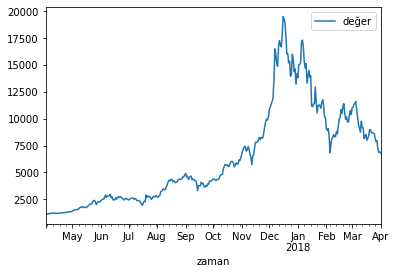

In [56]:
df.plot()

* Gördüğümüz gibi kendisi grafiği çizdi ve zamanları da aylara ayırdı.
* Matplotlib'in pyplot arayüzünü kullanarak da grafik çizebiliriz:

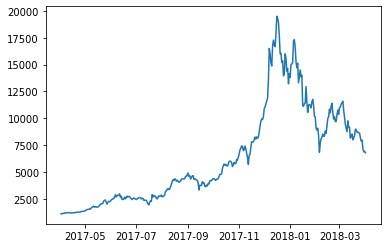

In [28]:
# import etmediysek edelim
import matplotlib.pyplot as plt

# grafiği x ve y eksenlerindeki değerleri vererek çizdirelim
plt.plot(df.index, df["değer"])